In [37]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data/GM5W1H_results.csv", sep=';', header=0)

In [3]:
data

,Who,What,When,Where,Why,How,Category
0,NaN,NaN,1.0,1.0,NaN,1.0,Business
1,NaN,NaN,NaN,NaN,0.0,0.0,Business
2,1.0,1.0,NaN,NaN,NaN,1.0,Business
3,0.5,1.0,NaN,NaN,0.0,0.5,Business
4,1.0,1.0,NaN,1.0,0.5,0.0,Business
...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,Tech
96,0.0,0.5,NaN,NaN,0.0,0.0,Tech
97,1.0,1.0,0.0,1.0,NaN,1.0,Tech
98,1.0,0.5,NaN,NaN,1.0,1.0,Tech


In [4]:
business = data[data['Category'] == "Business"]
business = business.drop('Category', axis = 1)

In [5]:
business_Who = business['Who']

In [6]:
business_Who = business_Who.dropna()

In [7]:
business_Who.mean()

0.8846153846153846

In [8]:
categories = ['Business', 'Entertainment', 'Politics', 'Sport', 'Tech'] 
questions = ['Who', 'What', 'When', 'Where', 'Why', 'How']

In [9]:
dict_cat = {}
dict_cat_withNaN = {}

for category in categories:
    
    temp = data[data['Category'] == category].drop('Category', axis = 1)
    accuracies = []
    accuracies_withNaN = []
    
    for q in questions:
        accuracies.append(temp[q].dropna().mean())
        accuracies_withNaN.append(temp[q].fillna(0).mean())
        
    dict_cat[category] = accuracies 
    dict_cat_withNaN[category] = accuracies_withNaN

In [10]:
df = pd.DataFrame(dict_cat, index = questions)
df_withNaN = pd.DataFrame(dict_cat_withNaN, index = questions)

In [11]:
df

,Business,Entertainment,Politics,Sport,Tech
Who,0.884615,0.900000,0.777778,0.857143,0.833333
What,0.846154,0.666667,0.722222,0.892857,0.833333
When,1.000000,0.500000,1.000000,0.800000,0.666667
Where,0.875000,0.750000,1.000000,1.000000,0.900000
Why,0.350000,0.166667,0.200000,0.366667,0.318182
How,0.657895,0.684211,0.600000,0.562500,0.815789


In [12]:
Accuracy = pd.concat([df, df_withNaN], keys=['withoutNaN', 'withNaN'])

In [13]:
Accuracy.head()

Business  Entertainment  Politics     Sport      Tech
withoutNaN Who    0.884615       0.900000  0.777778  0.857143  0.833333
           What   0.846154       0.666667  0.722222  0.892857  0.833333
           When   1.000000       0.500000  1.000000  0.800000  0.666667
           Where  0.875000       0.750000  1.000000  1.000000  0.900000
           Why    0.350000       0.166667  0.200000  0.366667  0.318182

In [14]:
import matplotlib.pyplot as plt

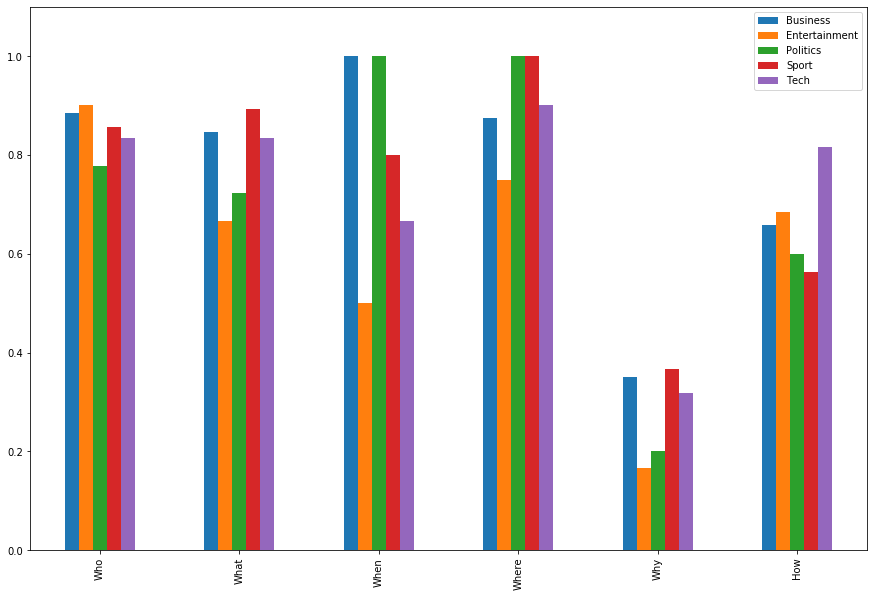

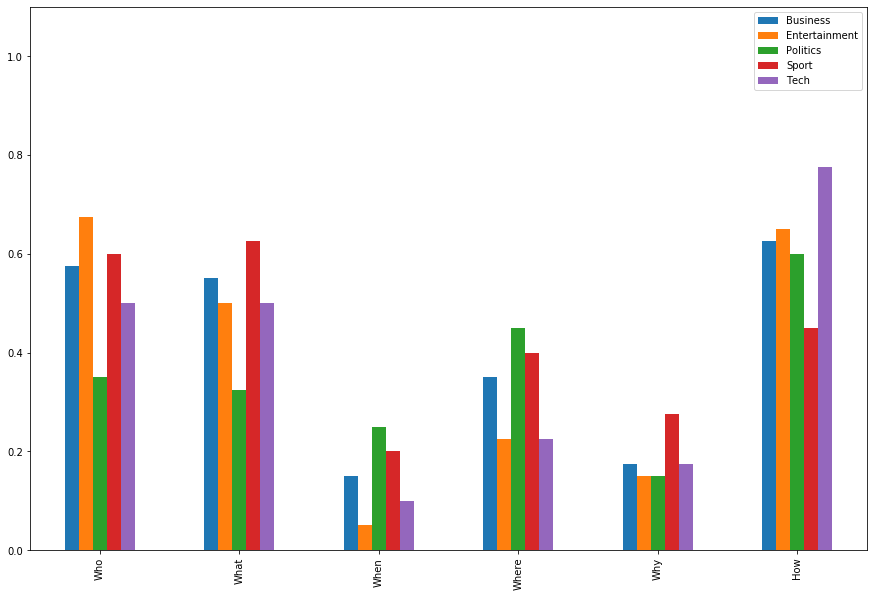

In [15]:
df.plot(figsize=(15, 10), kind = "bar", ylim = (0,1.1))
df_withNaN.plot(figsize=(15, 10), kind = "bar", ylim = (0,1.1))

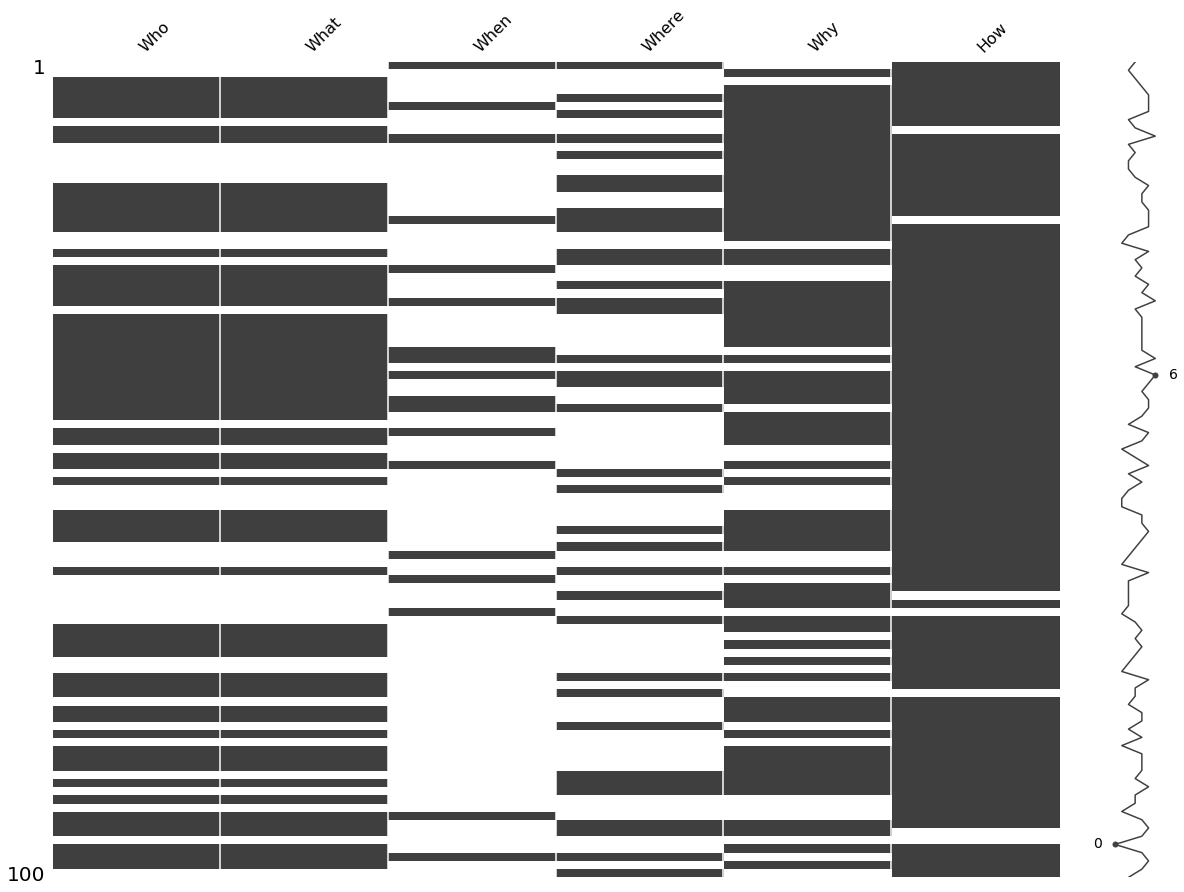

In [16]:
import missingno
missingno.matrix(data.drop('Category', axis = 1), figsize = (20,15))


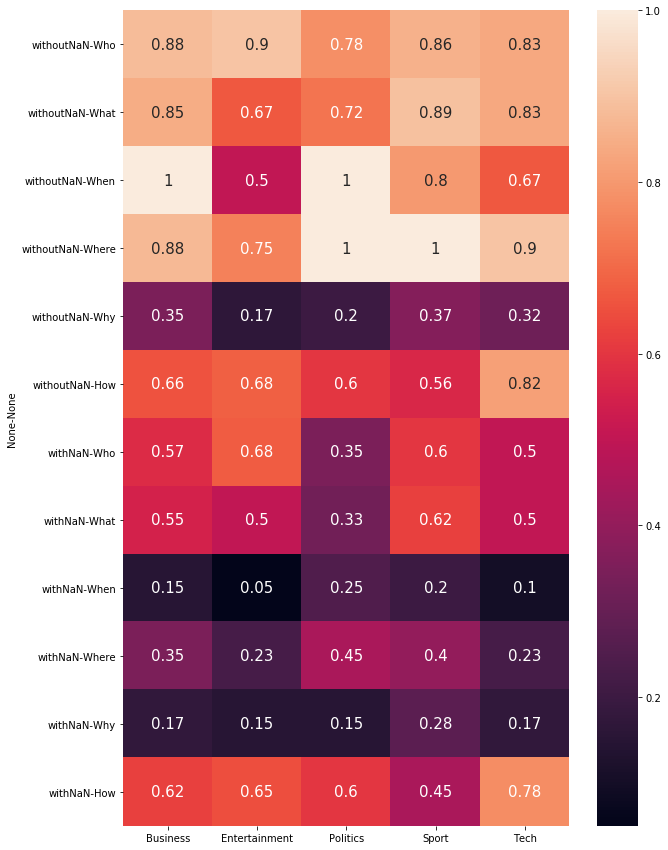

In [17]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10,15))
ax = sns.heatmap(Accuracy, annot=True ,annot_kws={'size':15})

In [18]:
cat = {}

for category in categories:
    
    temp = data[data['Category'] == category].drop('Category', axis = 1)
    values = []
    for q in questions:
        temp_list = temp[q].tolist()
        for i in range(len(temp_list)):
            values.append(temp_list[i])
    

    cat[category] = values

In [19]:
df_cat = pd.DataFrame(cat)

In [20]:
df_cat

,Business,Entertainment,Politics,Sport,Tech
0,NaN,1.0,NaN,0.5,1.0
1,NaN,1.0,NaN,1.0,NaN
2,1.0,NaN,NaN,1.0,NaN
3,0.5,1.0,NaN,1.0,0.5
4,1.0,0.5,NaN,1.0,NaN
...,...,...,...,...,...
115,1.0,1.0,1.0,0.0,NaN
116,1.0,1.0,1.0,1.0,0.0
117,NaN,1.0,0.0,1.0,1.0
118,1.0,1.0,1.0,1.0,1.0


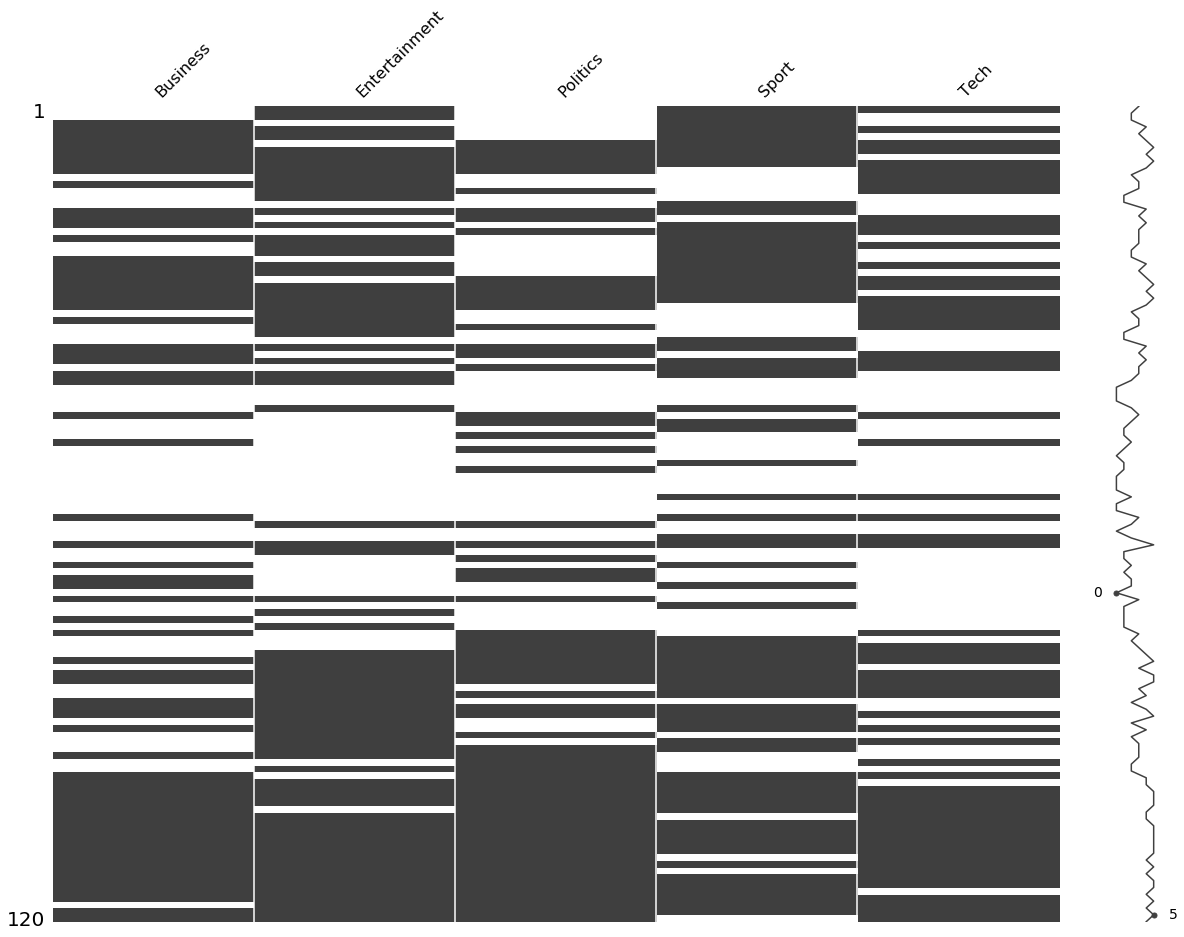

In [21]:
missingno.matrix(df_cat, figsize = (20,15))

In [22]:
df_acc_cat = df

In [23]:
df_acc_cat = df_acc_cat.drop(['Why','How'])

In [24]:
df_acc_cat

,Business,Entertainment,Politics,Sport,Tech
Who,0.884615,0.900000,0.777778,0.857143,0.833333
What,0.846154,0.666667,0.722222,0.892857,0.833333
When,1.000000,0.500000,1.000000,0.800000,0.666667
Where,0.875000,0.750000,1.000000,1.000000,0.900000


In [25]:
cat_4 = df_acc_cat.mean().to_numpy()

In [26]:
cat_6 = df.mean().to_numpy()

In [42]:
print(cat_4)
print(cat_6)

[0.90144231 0.70416667 0.875      0.8875     0.80833333 0.83528846]
[0.76894399 0.61125731 0.71666667 0.74652778 0.7278841  0.71425597]


In [41]:
cat_4 = np.append(cat_4, cat_4.mean())
cat_6 = np.append(cat_6, cat_6.mean())

In [59]:
dict_combined = {}
    
dict_combined['4W'] = cat_4
dict_combined['5W1H'] = cat_6

In [60]:
indices = ['Business', 'Entertainment', 'Politics', 'Sport', 'Tech', 'All']
df_combined = pd.DataFrame(dict_combined, index = indices)
df_combined

,4W,5W1H
Business,0.901442,0.768944
Entertainment,0.704167,0.611257
Politics,0.875000,0.716667
Sport,0.887500,0.746528
Tech,0.808333,0.727884
All,0.835288,0.714256


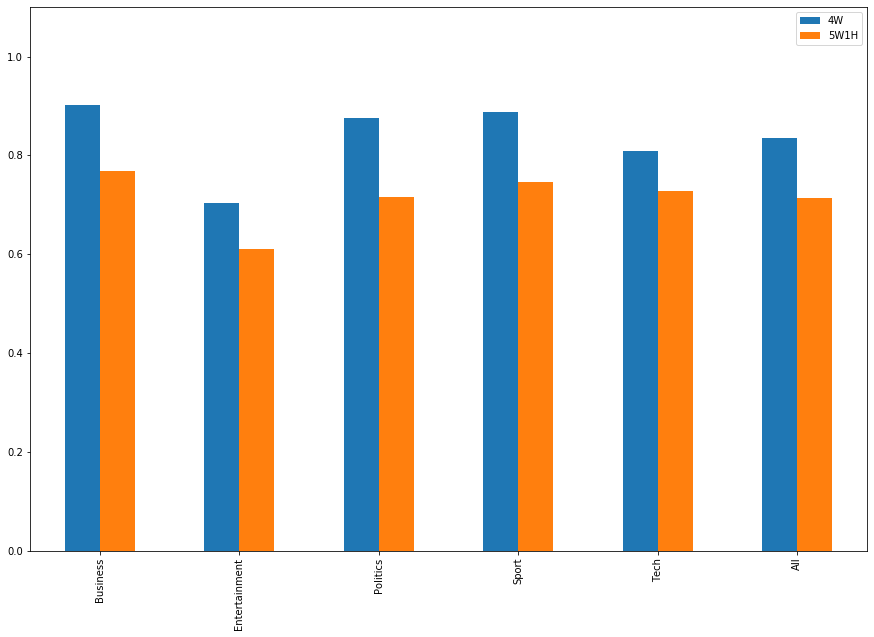

In [61]:
df_combined.plot(figsize=(15, 10), kind = "bar", ylim = (0,1.1))